<a href="https://colab.research.google.com/github/Sambaran04/Tensorflow/blob/main/Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Regression with Neural Network in TensorFlow**

There are many definitions for a regression problem but in our case, we're going to simplify it: Predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TenforFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

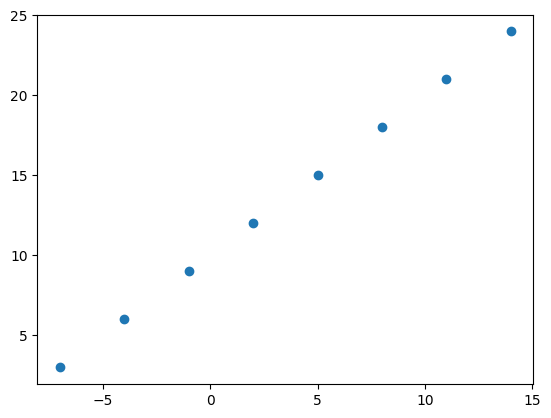

In [ ]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [ ]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
# Create a debo tensor for our housing price prediciton problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0].shape, y[0].shape

((), ())

In [ ]:
X = tf.constant(X)
y = tf.constant(y)

In [ ]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float64, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float64, numpy=3.0>)

## Steps in modelling with TensorFlow

1. **Creating a model**- define the inpur and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model**- define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to imporve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model**- letting the model try to find patterns between X & y (features and labels).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([tf.keras.layers.Flatten(), tf.keras.layers.Dense(1)])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 412ms/step - loss: 10.3327 - mae: 10.3327
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 10.2002 - mae: 10.2002
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 10.0677 - mae: 10.0677
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 9.9352 - mae: 9.9352
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 9.8027 - mae: 9.8027


In [ ]:
# Try and make a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 99ms/step


array([[18.409006]], dtype=float32)

## Improving our Model

In [ ]:
# Let's rebuild our model

# tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([tf.keras.layers.Flatten(), tf.keras.layers.Dense(1)])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
# model.fit(X, y, epochs=1000)

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 85ms/step


array([[28.090908]], dtype=float32)

In [ ]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer = tf.keras.optimizers.Adam(lr=0.01),
              metrics = ["mae"])

# 3. Fit the model
# model.fit(X, y, epochs=1000)

In [ ]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 144ms/step


array([[27.1549]], dtype=float32)

## Evaluating the model

In practice, a typical workflow you'll go through when builidng neural network is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> twea a model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words we should memorize:

> "Visualize, Visualize, Visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)

In [2]:
# Make a bigger dataset:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [3]:
# Make labels for the dataset
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

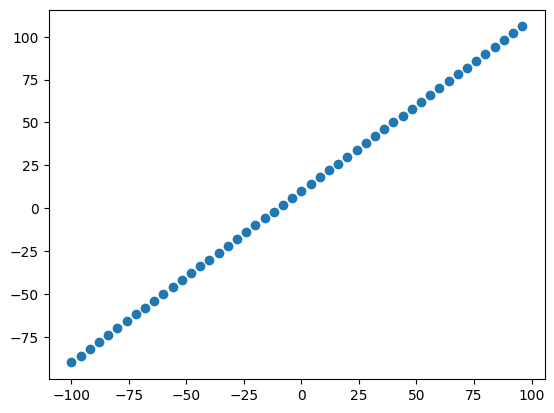

In [4]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### There are 3 Sets...

* Training set - the model learns from this data, which is typically 70-80% of the total data you have available.
* Validation set - The model gets tuned on this data, which is typcically 10-15% of the data available.
* Test set - The model gets evaluated on this data to test what it has learnt, this set is typically 10-15% of the data available.

In [5]:
# Check the length of how many samples we have
len(X)

50

In [6]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again

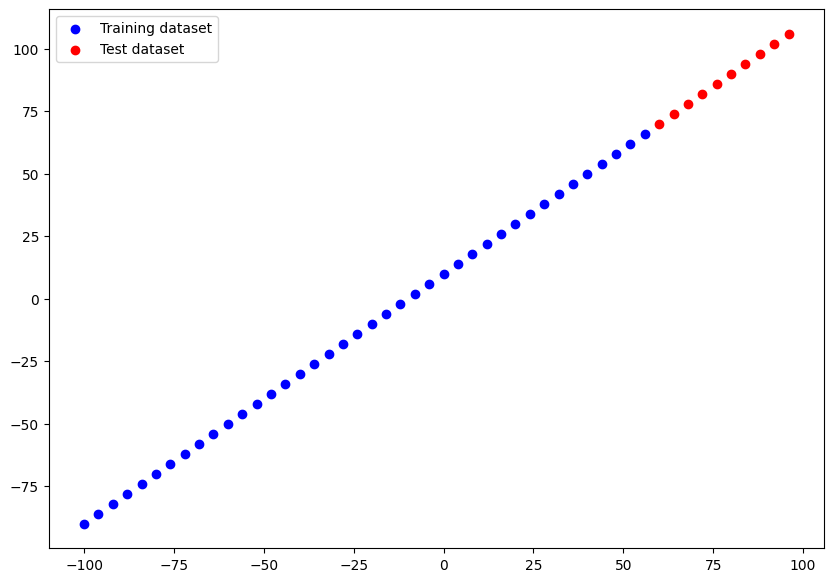

In [7]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label = "Training dataset")
# Plot test data in green
plt.scatter(X_test, y_test, c="r", label = "Test dataset")
plt.legend()

In [8]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer = tf.keras.optimizers.Adam(lr=0.01),
              metrics = ["mae"])

# 3. Fit the model
model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
2/2 [==============================] - 1s 27ms/step - loss: 25.4300 - mae: 25.4300
Epoch 2/1000
2/2 [==============================] - 0s 25ms/step - loss: 23.2570 - mae: 23.2570
Epoch 3/1000
2/2 [==============================] - 0s 13ms/step - loss: 21.2500 - mae: 21.2500
Epoch 4/1000
2/2 [==============================] - 0s 15ms/step - loss: 19.1077 - mae: 19.1077
Epoch 5/1000
2/2 [==============================] - 0s 8ms/step - loss: 17.0042 - mae: 17.0042
Epoch 6/1000
2/2 [==============================] - 0s 8ms/step - loss: 15.0650 - mae: 15.0650
Epoch 7/1000
2/2 [==============================] - 0s 7ms/step - loss: 13.0467 - mae: 13.0467
Epoch 8/1000
2/2 [==============================] - 0s 7ms/step - loss: 11.1864 - mae: 11.1864
Epoch 9/1000
2/2 [==============================] - 0s 7ms/step - loss: 9.5673 - mae: 9.5673
Epoch 10/1000
2/2 [==============================] - 0s 7ms/step - loss: 8.2778 - mae: 8.2778
Epoch 11/1000
2/2 [==============================

In [14]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 44ms/step


In [15]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [16]:
y_pred

array([[ 69.96548 ],
       [ 73.96186 ],
       [ 77.958244],
       [ 81.954636],
       [ 85.95103 ],
       [ 89.94742 ],
       [ 93.9438  ],
       [ 97.9402  ],
       [101.936584],
       [105.93297 ]], dtype=float32)